<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20221027.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* Customer Analysis
* Iterator

In [3]:
import pandas as pd 
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes
import matplotlib.pyplot as plt
import seaborn as sns 
from datetime import datetime, timezone, timedelta, time, date
import re
import os

from collections import defaultdict 
from functools import reduce


# Customer Analysis

In [4]:
os.listdir()

['.config',
 '1_orders_dataset.csv',
 'sample-sales-data.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 'mock_sales_data.csv',
 'sales.csv',
 'scanner_data.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 '1_customers_dataset.csv',
 'groceries.csv',
 'test.csv',
 '1_order_payments_dataset.csv',
 'sales_data_with_stores.csv',
 'mall_customers.csv',
 'sales_vs_discount.csv',
 'online_retail.xlsx',
 'match_result_test.csv',
 'ecommerce-data.csv',
 'online_retail_II.xlsx',
 'sample_data']

In [14]:
df = pd.read_excel('KPMG_VI_New_raw_data_update_final.xlsx', sheet_name = 'Transactions')
df.head()

,Note: The data and information in this document is reflective of a hypothetical situation and client. This document is to be used for KPMG Virtual Internship purposes only.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145


In [15]:
df.columns = df.iloc[0]
df.drop([0], axis = 0, inplace = True)
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
1,1,2,2950,2017-02-25 00:00:00,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245
2,2,3,3120,2017-05-21 00:00:00,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701
3,3,37,402,2017-10-16 00:00:00,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361
4,4,88,3135,2017-08-31 00:00:00,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.1,36145
5,5,78,787,2017-10-01 00:00:00,True,Approved,Giant Bicycles,Standard,medium,large,1765.3,709.48,42226


In [16]:
df = df[df.order_status == 'Approved']
df.transaction_date = df.transaction_date.to_numpy().astype('datetime64[ns]')
df['date'] = df.transaction_date.to_numpy().astype('datetime64[D]')
df['week'] = df['date'] - df['date'].dt.weekday.astype('timedelta64[D]')
df['month'] = df.transaction_date.to_numpy().astype('datetime64[M]')
df = df.groupby(['customer_id', 'date','week'])['list_price'].sum().reset_index().rename(columns = {'list_price':'rev'})
df.head()

,customer_id,date,week,rev
0,1,2017-01-05,2017-01-02,360.4
1,1,2017-02-21,2017-02-20,71.49
2,1,2017-03-27,2017-03-27,688.63
3,1,2017-03-29,2017-03-27,1274.93
4,1,2017-04-06,2017-04-03,1577.53


In [18]:
df_ = df.groupby(['customer_id', 'week'])['rev'].sum().reset_index().sort_values(['customer_id', 'week']).rename(columns = {'customer_id':'id'})
df_.head()

,id,week,rev
0,1,2017-01-02,360.4
1,1,2017-02-20,71.49
2,1,2017-03-27,1963.56
3,1,2017-04-03,1577.53
4,1,2017-05-08,1720.7


In [22]:
list_npu = df_.groupby(['id']).head(1)
list_week = df_['week'].sort_values().unique()

res = list() 

for weeks in list_week : 

  temp_npu = list_npu[list_npu['week'] == weeks]
  temp_pu = df_[df_['id'].isin(temp_npu['id'])]
  temp = temp_pu.groupby(['week'])['id'].count().reset_index().rename(columns = {'id':'pu'})
  temp['npu_week'] = np.repeat(weeks, len(temp))
  temp['diff'] = (temp['week'] - temp['npu_week']) // 7
  temp['ratio'] = round(temp['pu']/temp['pu'].max() * 100, 2)
  temp['npu_week'] = temp['npu_week'].astype(str)
  temp = temp[['npu_week', 'diff', 'pu', 'ratio']]

  res.append(temp)

res = pd.concat(res)
res = pd.melt(res, id_vars = ['npu_week', 'diff'], var_name = 'type')
res.head()

,npu_week,diff,type,value
0,2016-12-26,0 days,pu,51.0
1,2016-12-26,1 days,pu,2.0
2,2016-12-26,2 days,pu,6.0
3,2016-12-26,3 days,pu,4.0
4,2016-12-26,4 days,pu,8.0


/usr/local/lib/python3.7/dist-packages/plotnine/stats/stat_smooth.py:206: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message a surprise, make sure the column mapped to the x aesthetic has the right dtype.
/usr/local/lib/python3.7/dist-packages/plotnine/facets/facet.py:393: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.


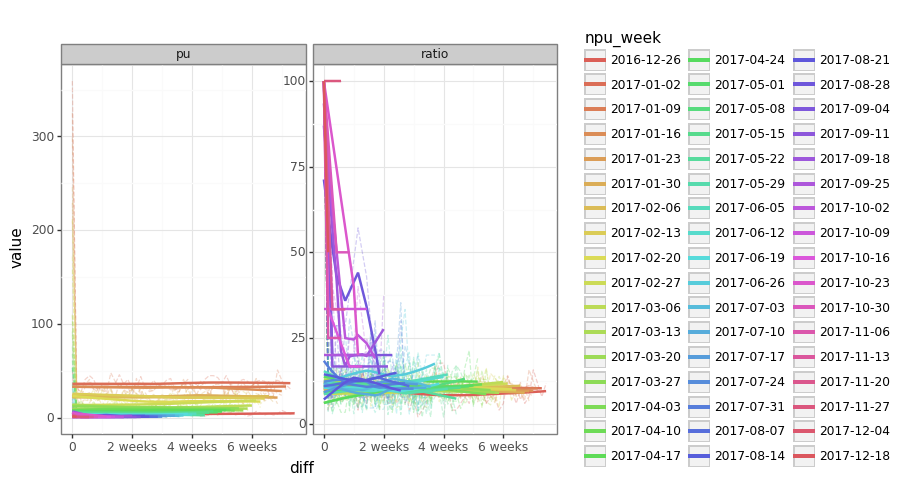

<ggplot: (8764737373245)>

In [27]:
(
    ggplot(res, aes('diff', 'value', color = 'npu_week')) +
    gg.geom_line(alpha = .3, linetype = 'dashed') +
    gg.geom_smooth(se = False) +
    gg.facet_wrap('~type', scales = 'free_y') +
    gg.theme_bw()
) 

# Iterator

In [37]:
from string import ascii_lowercase
lt = list(ascii_lowercase) + list(range(10))

names = ['park', 'kim', 'lee']

email1 = [''.join(np.random.choice(lt, np.random.randint(7, 11, 1), replace = True)) for a in range(3)]
email2 = np.random.choice(['gmail.com', 'naver.com', 'msn.co.kr', 'nate.com'], 3, replace = True)
email = [a + '@' + b for a, b in zip(email1, list(email2))]

score = np.random.randint(30, 50, 3)
age = np.random.randint(20, 40, 3)

print(names)
print(email)
print(score)
print(age)

['park', 'kim', 'lee']
['e4052g2ekq@msn.co.kr', '5d4bdw8aq5@msn.co.kr', 'xo81655j6@msn.co.kr']
[40 30 45]
[30 24 33]


In [38]:
[{k : v} for k, v in zip(names, zip(email, score, age))]

[{'park': ('e4052g2ekq@msn.co.kr', 40, 30)},
 {'kim': ('5d4bdw8aq5@msn.co.kr', 30, 24)},
 {'lee': ('xo81655j6@msn.co.kr', 45, 33)}]